In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## パーセプトロン

$$ \begin{eqnarray}
\phi(z) = \left\{ 
    \begin{array}{ll}
        1 & (z >= \theta) \\
        -1 & (z < \theta) \\
    \end{array} \right.
\end{eqnarray} $$

$$ z = w^T x $$
$ w = \{w_1, w_2, \cdots, w_n \}$, 
$ x = \{x_1, x_2, \cdots, x_n \} $

\begin{eqnarray}
\phi(z^{\prime}) = \left\{ 
    \begin{array}{ll}
        1 & (z^{\prime} >= 0) \\
        -1 & (z^{\prime} < 0) \\
    \end{array} \right.
\end{eqnarray}

\begin{eqnarray}
    z^{\prime} &=& z - \theta \\
        &=& w^T x - \theta \\
        &=& w^T x + (- \theta) \cdot 1 \\
        &=& w^T x 
\end{eqnarray}

$ w = \{w_0, w_1, w_2, \cdots, w_n \}$ ($ w_0 = -\theta$), 

$ x = \{x_0, x_1, x_2, \cdots, x_n \}$ ($w_0 = 1$)

$$ w_j := w_j + \Delta w_j $$

$$ \Delta w_j = \eta \left(y^{(i)} - \hat{y}^{(i)} \right) x_j^{(i)} $$

* $y$ は出力（ラベル）
* $\eta$ は学習率

In [3]:
np.where(np.array([1,2,3]) > 2, 1, -1)

array([-1, -1,  1])

In [6]:
class Perceptron(object):
    def __init__(self, eta=0.01, n_iter=10):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    # z^{\prime}
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    # \phi(z^{\prime})
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

In [6]:
df = pd.read_csv('data/iris.data', header = None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [7]:
y = np.where(df.iloc[0:100, 4].values == 'Iris-setosa', -1, 1)
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [8]:
X = df.iloc[0:100, [0, 2]].values
X

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5],
       [ 5. ,  1.4],
       [ 5.4,  1.7],
       [ 4.6,  1.4],
       [ 5. ,  1.5],
       [ 4.4,  1.4],
       [ 4.9,  1.5],
       [ 5.4,  1.5],
       [ 4.8,  1.6],
       [ 4.8,  1.4],
       [ 4.3,  1.1],
       [ 5.8,  1.2],
       [ 5.7,  1.5],
       [ 5.4,  1.3],
       [ 5.1,  1.4],
       [ 5.7,  1.7],
       [ 5.1,  1.5],
       [ 5.4,  1.7],
       [ 5.1,  1.5],
       [ 4.6,  1. ],
       [ 5.1,  1.7],
       [ 4.8,  1.9],
       [ 5. ,  1.6],
       [ 5. ,  1.6],
       [ 5.2,  1.5],
       [ 5.2,  1.4],
       [ 4.7,  1.6],
       [ 4.8,  1.6],
       [ 5.4,  1.5],
       [ 5.2,  1.5],
       [ 5.5,  1.4],
       [ 4.9,  1.5],
       [ 5. ,  1.2],
       [ 5.5,  1.3],
       [ 4.9,  1.5],
       [ 4.4,  1.3],
       [ 5.1,  1.5],
       [ 5. ,  1.3],
       [ 4.5,  1.3],
       [ 4.4,  1.3],
       [ 5. ,  1.6],
       [ 5.1,  1.9],
       [ 4.8,  1.4],
       [ 5.1,  1.6],
       [ 4.6,

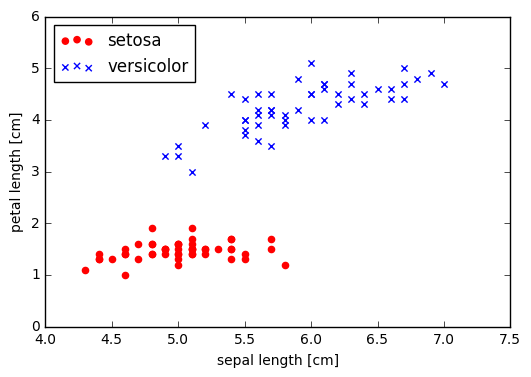

In [28]:
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100,0], X[50:100,1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

In [29]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

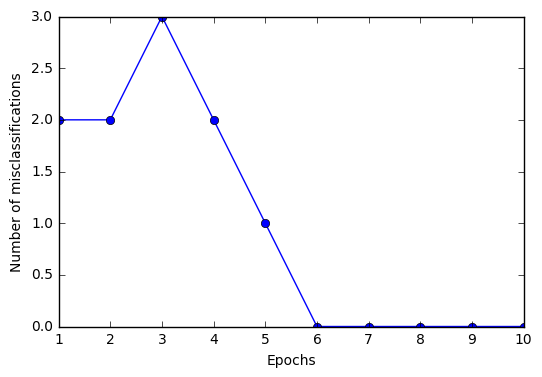

In [30]:
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()

In [29]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))

    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)

    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx),
        marker=markers[idx], label=cl)

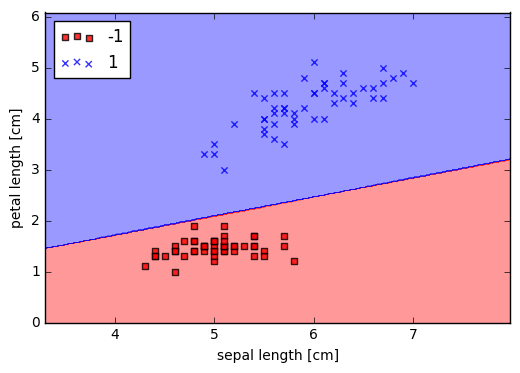

In [39]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

## ADALINE

コスト関数 $J$

$$ J(w) = \frac{1}{2}\sum\limits_i\left( y^{(i)} - \phi\left(z^{(i)} \right)  \right)^2 $$

入力は

$$ \phi (z) = \phi(w^T x) = w^T x $$

重みの更新

$$ w := w + \Delta w$$

重みの変化 = 学習率 × (- コスト関数の勾配)

$$ \Delta w = -\eta \nabla J(w) $$

コスト関数の勾配: コスト関数を偏微分する

$$ \frac{\partial J}{\partial w_j} = - \sum \limits_i \left( y^{(i)} - \phi \left( z^{(i)}\right)  \right) x_j^{(i)} $$

重み $\Delta w_j$ の更新は

$$ \Delta w_j = -\eta \nabla J(w_j) = -\eta \frac{\partial J}{\partial w_j} = \eta \sum \limits_i \left( y^{(i)} - \phi \left( z^{(i)}\right)  \right) x_j^{(i)}$$

In [1]:
class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
    
    def fit(self, X, y):
        # 重みの初期化
        # 特徴の数
        self.w_ = np.zeros(1 + X.shape[1])
        
        self.cost_ = []
        
        for i in range(self.n_iter):
            
            # 活性化関数の出力
            output = self.net_input(X)
            
            # 誤差: y - \phi(z)
            errors = (y - output)

            # 重み: \Delta w_j = \eta * \sum (errors * x_j)
            self.w_[1:] += self.eta * X.T.dot(errors)
            
            # w_0 = \eta * \sum (errors * 1)
            self.w_[0] += self.eta * errors.sum()
            
            # コスト関数
            cost = (errors ** 2).sum() / 2.0
            
            # コスト
            self.cost_.append(cost)
        return self
    
    # 総入力
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    # 活性化関数（恒等関数）: \phi(w^T x) = w^T x
    def activation(self, X):
        return self.net_input(X)
    
    # クラスラベル
    def predict(self, X):
        return np.where(self.activation(X) >= 0.0, 1, -1)

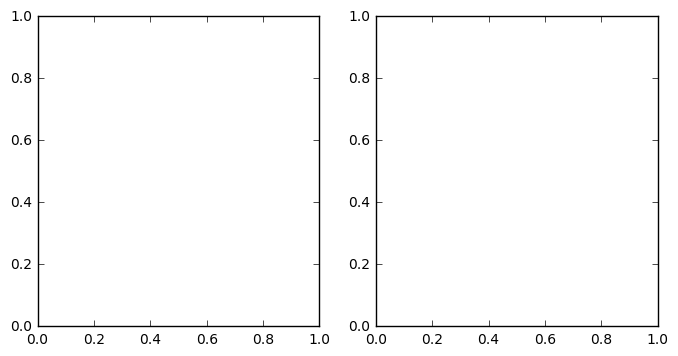

In [9]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

In [10]:
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)

In [11]:
ada1.cost_

[50.0,
 2230.8539602549999,
 3475977.0425619674,
 5423372722.5878315,
 8461791557634.3311,
 13202470134517624.0,
 2.0599091394023023e+19,
 3.2139634624124605e+22,
 5.0145712449819432e+25,
 7.8239609955381275e+28]

In [12]:
ax[0].plot(range(1,len(ada1.cost_)+1), np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

In [13]:
ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)

In [14]:
ada2.cost_

[50.0,
 48.069162686025493,
 46.756247850736642,
 45.675881529053832,
 44.6913293479668,
 43.753888361923508,
 42.846027487584522,
 41.961257613784404,
 41.097004964113069,
 40.252087948337085]

In [15]:
ax[1].plot(range(1,len(ada2.cost_)+1), ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')

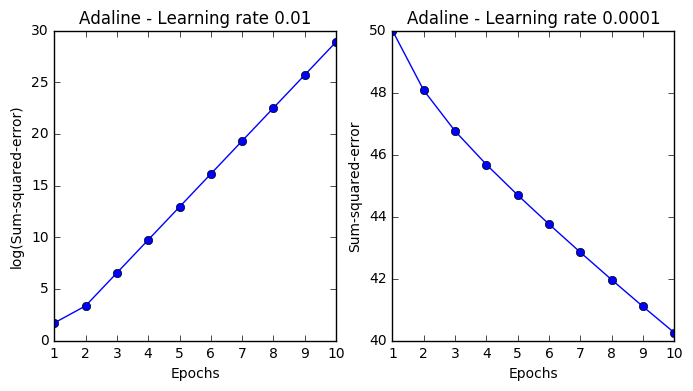

In [21]:
fig

In [22]:
ax

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020545C72B00>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0000020545D59278>], dtype=object)

特徴量の平均化

$$ x_j^{\prime} = \frac{x_j - \mu_j}{\sigma_j} $$

In [25]:
X_std = np.copy(X)

In [26]:
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

In [27]:
ada = AdalineGD(n_iter=15, eta=0.01)

In [28]:
ada.fit(X_std, y)

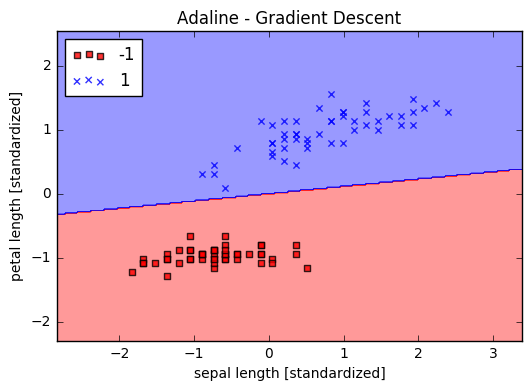

In [34]:
plot_decision_regions(X_std, y, classifier=ada)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.show()

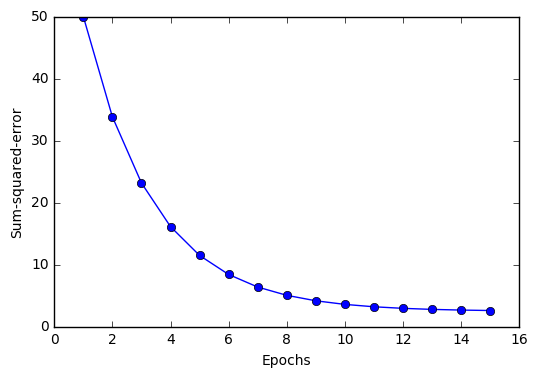

In [36]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')
plt.show()